In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('kaggle_movie_train.csv')
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [32]:
data.columns

Index(['id', 'text', 'genre'], dtype='object')

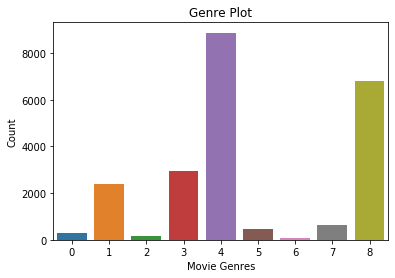

In [51]:
plt.figure()
sns.countplot(x='genre',data=data)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [34]:
movie_genre = data['genre'].unique()
movie_genre.sort()
movie_genre

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [35]:
genre_mapping = {'other':0,'action':1,'adventure':2,'comedy':3,'drama':4,'horror':5,'romance':6,'sci-fi':7,'thriller':8}
data['genre'] = data['genre'].map(genre_mapping)
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4


In [36]:
data.isna().any()

id       False
text     False
genre    False
dtype: bool

In [37]:
data.drop('id',axis=1,inplace=True)

In [52]:
data.shape

(22579, 2)

In [40]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
corpus = []
ps = PorterStemmer()
stpwords = set(stopwords.words('english'))

In [64]:
maxLength = 0
for i in range(0,data.shape[0]):
    # allowing only alphabet
    desc = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['text'][i])
    # converting all characters to lower
    desc = desc.lower()
    words = desc.split()
    words = [word for word in words if word not in stpwords]
    words = [ps.stem(word) for word in words]
    desc = ' '.join(words)
    if len(desc)>maxLength:
        maxLength = len(desc)
    corpus.append(desc)

In [65]:
len(corpus),maxLength

(22579, 919)

In [66]:
data['genre'].unique()

array([8, 3, 4, 1, 7, 0, 6, 5, 2], dtype=int64)

In [81]:
# creating the bag of models 
# maxfeatures  ====> If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer(max_features=10000,ngram_range=(1,2))   # (1,2) means both unigrams and bigrams
X = countvectorizer.fit_transform(corpus).toarray()
y = data['genre'].values

In [82]:
X.shape,y.shape

((22579, 10000), (22579,))

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18063, 10000), (4516, 10000), (18063,), (4516,))

In [85]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[  64,    0,    0,    0,    2,    0,    0,    0,    0],
       [   1,  447,    0,    9,    7,    2,    0,    2,    5],
       [   0,    1,   23,    0,    1,    0,    0,    0,    0],
       [   0,    6,    0,  572,   27,    6,    0,    7,   17],
       [   3,   40,    3,   32, 1529,   20,    0,   11,   90],
       [   0,    1,    0,    0,    2,   79,    0,    0,    2],
       [   0,    1,    0,    0,    0,    0,   11,    0,    0],
       [   0,    3,    0,    0,    0,    0,    0,   97,    6],
       [   1,   17,    0,   23,   88,   12,    0,   30, 1216]],
      dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.8941541186891054

In [90]:
# gaussian , 15000, acc = 42%
# multinomial, 15000, acc=65%
# logistic regression, 1500 acc = 68%

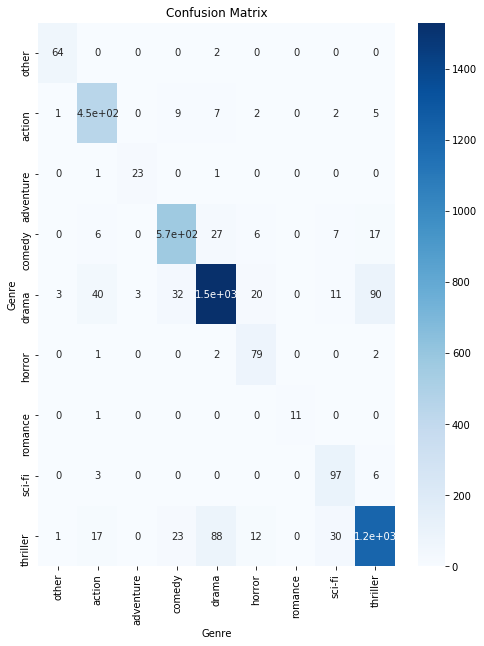

In [101]:
plt.figure(figsize=(8,10))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data = cm,cmap='Blues',annot=True,xticklabels=axis_labels,yticklabels=axis_labels)        
# annot=True - for numbers on blocks
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.title('Confusion Matrix')
plt.show()